# If you don't pip install bls it wont run

https://www.bls.gov/help/hlpforma.htm#OE THis is how to constuct the codes below.  Many dont haved ata behind them, you learn by trail and error.

In [1]:

%matplotlib notebook
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

import bls

api = 'a459ff69f6404e5089d9ef92e0f27bd7'

#19740 Denver metro # dont do the first set of var it was a waste of time. Make a list or just hard code them in.        
Denver_Aurora_Lakewood_01 = "SMU08197400000000001"
Denver_Aurora_Lakewood_total_private = "SMU08197400500000001"
Denver_Aurora_Lakewood_goods_producing = "SMU08197400600000001"
Denver_Aurora_Lakewood_service_providing = "SMU08197400700000001"
Denver_Aurora_Lakewood_private_sector_providing = "SMU08197400800000001"
Denver_Aurora_Lakewood_mining_logging_construction = "SMU08197401500000001"
Denver_Aurora_Lakewood_financial_activities = "SMU08197405500000001"
Denver_Aurora_Lakewood_31 = "SMU08197403100000001"
Denver_Aurora_Lakewood_32 = "SMU08197403200000001"
Denver_Aurora_Lakewood_40 = "SMU08197404000000001"
Denver_Aurora_Lakewood_41 = "SMU08197404100000001"
Denver_Aurora_Lakewood_42 = "SMU08197404200000001"
Denver_Aurora_Lakewood_43 = "SMU08197404300000001"
Denver_Aurora_Lakewood_50 = "SMU08197405000000001"
Denver_Aurora_Lakewood_55 = "SMU08197405500000001"
Denver_Aurora_Lakewood_60 = "SMU08197406000000001"
Denver_Aurora_Lakewood_65 = "SMU08197406500000001"
Denver_Aurora_Lakewood_70 = "SMU08197407000000001"
Denver_Aurora_Lakewood_80 = "SMU08197408000000001"
Denver_Aurora_Lakewood_90 = "SMU08197409000000001"
#SMU EARINGA
boulder_total = "SMU08145000000000001"
pueblo_total = "SMU08393800000000001"
pueblo_pvt = "SMU08393800500000001"

#SMU EARNING START
#14500 boulder
#48 TEXES
#53 WASHINGTON
#12420 Austin 
austin = ["SMU48124204000000001",
          "SMU48124206000000001", 
          "SMU48124206500000001",
          "SMU48124209000000001",
          "SMU48124200600000001"]
#42660	Seattle-Tacoma-Bellevue, WA
STB = ["SMU53426604000000001",
       "SMU53426606000000001", 
       "SMU53426606500000001",
       "SMU53426609000000001",
       "SMU53426600600000001"]
Denver_Aurora_Lakewood_total_per_hour = "SMU08197400500000003"

#01 EARNINGS
#03	Average Hourly Earnings of All Employees, In Dollars
den_5 = [ Denver_Aurora_Lakewood_40, 
         Denver_Aurora_Lakewood_60, 
         Denver_Aurora_Lakewood_65, 
         Denver_Aurora_Lakewood_90, 
         Denver_Aurora_Lakewood_goods_producing]

den_ue = 'LAUCN080310000000003'




In [2]:


#48
#14500
#SMU
#prefix1-2^
#Seasonal Adjustment3^
#State Code4-5^
#Area Code6-10^
#SuperSector and Industry Code11-18^
#Data Type Code-last2 ^
denver_earnings = bls.get_series([Denver_Aurora_Lakewood_01, 
                                  Denver_Aurora_Lakewood_total_private,
                                  Denver_Aurora_Lakewood_goods_producing, 
                                  Denver_Aurora_Lakewood_service_providing, 
                                  Denver_Aurora_Lakewood_private_sector_providing, 
                                  Denver_Aurora_Lakewood_mining_logging_construction,
                                  Denver_Aurora_Lakewood_31, 
                                  Denver_Aurora_Lakewood_32, 
                                  Denver_Aurora_Lakewood_40,
                                  Denver_Aurora_Lakewood_41, 
                                  Denver_Aurora_Lakewood_42, 
                                  Denver_Aurora_Lakewood_43, 
                                  Denver_Aurora_Lakewood_50, 
                                  Denver_Aurora_Lakewood_55,  
                                  Denver_Aurora_Lakewood_65,
                                  Denver_Aurora_Lakewood_60,
                                  Denver_Aurora_Lakewood_70,
                                  Denver_Aurora_Lakewood_80,
                                  Denver_Aurora_Lakewood_90], 2010, 2016, api)
Den_ue = 'LAUCN080310000000003'
Three_cool_cities = bls.get_series([Denver_Aurora_Lakewood_total_per_hour,
                                           "SMU53426600500000003",
                                           "SMU48124200500000003"], 2010, 2016, api)                  
Three_cool_cities = Three_cool_cities.rename(columns={"SMU08197400500000003":"Denver per hour",
                                                                    "SMU53426600500000003":"Seatle per hour",
                                                                    "SMU48124200500000003":"Austin per hour"}) 
Three_cool_cities_i = Three_cool_cities.reset_index()
get_pueblo = bls.get_series([pueblo_total,pueblo_pvt], 2010, 2016, api)
get_boulder = bls.get_series([boulder_total], 2010, 2016, api)
den_unemp = bls.get_series([den_ue], 2010, 2016, api)

In [3]:
#lANU ENEMPLYMENT

den_ue = 'LAUCN080310000000003'
den_unemp = bls.get_series([den_ue], 2010, 2016, api)

In [4]:
e_3_total = ["SMU48124200000000001","SMU53426604000000001",Denver_Aurora_Lakewood_01]
get_e_3 = bls.get_series(e_3_total, 2010, 2016 ,api)
x = get_e_3.rename(columns={"SMU48124200000000001":"Austin Total Earnings",
                                      "SMU53426604000000001":"Seatle Total Earnings", 
                                      "SMU08197400000000001":"Denver Total Earnings",})

In [206]:
get_austin = bls.get_series(austin,2010, 2016, api)
get_austin.head()
austin_df = get_austin.rename(columns={"SMU48124204000000001":"Trade, Transportation, and Utilities",
                                       "SMU48124206000000001":"Professional and Business Services", 
                                       "SMU48124206500000001":"Education and Health Services",
                                       "SMU48124209000000001":"Government",
                                       "SMU48124200600000001":"Goods Producing"})

In [207]:
seattle = bls.get_series(STB,2010, 2016, api)
sdf = seattle.rename(columns={"SMU53426604000000001":"Trade, Transportation, and Utilities",
                              "SMU53426606000000001":"Professional and Business Services", 
                              "SMU53426606500000001":"Education and Health Services",
                              "SMU53426609000000001":"Government",
                              "SMU53426600600000001":"Goods Producing"})

In [208]:
denver_3match = bls.get_series(den_5, 2010, 2016, api)

In [209]:
# change colume name 
denver_earnings = denver_earnings.rename(columns={"SMU08197400000000001":"Denver Metro Earings Total", 
                                                  "SMU08197400500000001":"Total Private",
                                                  "SMU08197400600000001": "Goods Producing", 
                                                  "SMU08197400700000001": "Service-Providing",
                                                  "SMU08197400800000001": "Private Service Providing",
                                                  "SMU08197401500000001": "Mining, Logging, and Construction",
                                                  "SMU08197403100000001": "Durable Goods", 
                                                  "SMU08197405500000001": "Financial Activities",
                                                  "SMU08197403200000001": "Non-Durable Goods",
                                                  "SMU08197404000000001": "Trade, Transportation, and Utilities",
                                                  "SMU08197404100000001": "Wholesale Trade",
                                                  "SMU08197404200000001": "Retail Trade",
                                                  "SMU08197404300000001": "Trasportation, and Utilities",
                                                  "SMU08197405000000001": "Information",
                                                  "SMU08197406000000001": "Professional and Business Services",
                                                  "SMU08197406500000001": "Education and Health Services",
                                                  "SMU08197407000000001": "Leisure and Hospitality",
                                                  "SMU08197408000000001": "Other Services",
                                                  "SMU08197409000000001": "Government"})  

boulder= get_boulder.rename(columns={'SMU08145000000000001': "Boulder total Earnings"})
peublo = get_pueblo.rename(columns={'SMU08393800000000001':"Pueblo Total"})

In [210]:
denver_earnings.head(2)

,Denver Metro Earings Total,Total Private,Goods Producing,Service-Providing,Private Service Providing,"Mining, Logging, and Construction",Durable Goods,Non-Durable Goods,"Trade, Transportation, and Utilities",Wholesale Trade,Retail Trade,"Trasportation, and Utilities",Information,Financial Activities,Education and Health Services,Professional and Business Services,Leisure and Hospitality,Other Services,Government
date,,,,,,,,,,,,,,,,,,,
2010-01,1162.4,990.5,127.8,1034.6,862.7,67.5,37.7,22.6,225.0,60.9,117.9,46.2,43.9,90.5,139.6,197.1,119.5,47.1,171.9
2010-02,1167.6,990.0,127.2,1040.4,862.8,66.9,37.7,22.6,223.9,60.7,116.7,46.5,43.7,90.4,140.8,198.0,119.1,46.9,177.6


In [211]:
# So I could later make the thousands millions for effect
denver_mil = denver_earnings/1000
sdf = sdf/1000
austin_df = austin_df/1000
boulder = boulder/1000
peublo = peublo/1000
e_3_df = x/1000
#denver_dis = denver_mil.describe()
#denver_dis.reset_index()


In [228]:
# flip to sort
denver_mil_t = denver_mil.T
austin_df_t = austin_df.T
sdf_t = sdf.T
#sort
t_austin_df = austin_df_t.sort_values("2016-09", ascending=False)
t_denver_e_mil = denver_mil_t.sort_values("2016-09", ascending=False)
t_sdf_t = sdf_t.sort_values("2016-09", ascending=False)
#flip it back
rdy_string_alt_austin_df = t_austin_df.T
rdy_string_alt_sdf = t_sdf_t.T
rdy_string_alt_denver_mil = t_denver_e_mil.T

date_df = rdy_string_alt_denver_mil.reset_index()
rdy_set = rdy_string_alt_sdf.reset_index() 
red_aus = rdy_string_alt_austin_df.reset_index()


In [256]:
# altered for groupby
#denver
red_aus['year'] = red_aus['date'].astype('str')
rdy_set['year'] = rdy_set['date'].astype('str')
date_df['year'] = date_df['date'].astype('str') 


In [257]:
rdy_set['year'] = rdy_set['year'].str.partition('-') 
red_aus['year'] = red_aus['year'].str.partition('-') 
date_df['year'] = date_df['year'].str.partition('-') 
#date_df.head(2)


In [261]:
#state_df['Year'] will be required for next groupby objects
drop_aus = red_aus.drop(columns=['date'])
drop_set = rdy_set.drop(columns=['date'])
date_df.drop(columns=['date'])
date_df.head(1)




,date,Denver Metro Earings Total,Service-Providing,Total Private,Private Service Providing,"Trade, Transportation, and Utilities",Professional and Business Services,Government,Education and Health Services,Goods Producing,...,Retail Trade,Financial Activities,"Mining, Logging, and Construction",Wholesale Trade,Other Services,"Trasportation, and Utilities",Information,Durable Goods,Non-Durable Goods,year
0,2010-01,1.1624,1.0346,0.9905,0.8627,0.225,0.1971,0.1719,0.1396,0.1278,...,0.1179,0.0905,0.0675,0.0609,0.0471,0.0462,0.0439,0.0377,0.0226,2010


In [286]:
s_data_df = drop_set.groupby(["year"]).sum()
a_data_df = drop_aus.groupby(["year"]).sum()
den_metro = date_df.groupby(["year"]).sum()

mean_den_metro_10y = den_metro.groupby(["year"]).mean()
std_den_metro_10y = den_metro.groupby(["year"]).std()
std_aus_metro_10y = s_data_df.groupby(["year"]).mean()
std_set_metro_10y = s_data_df.groupby(["year"]).mean()
dfa = a_data_df.reset_index()
dfs = s_data_df.reset_index()
df = den_metro.reset_index()
df_mean_den_metro_10y = mean_den_metro_10y.reset_index()
df_std_den_metro_10y = std_den_metro_10y.reset_index()
df_std_aus_10y = std_aus_metro_10y.reset_index()
df_mean_set_metro_10y = std_set_metro_10y()

<IPython.core.display.Javascript object>


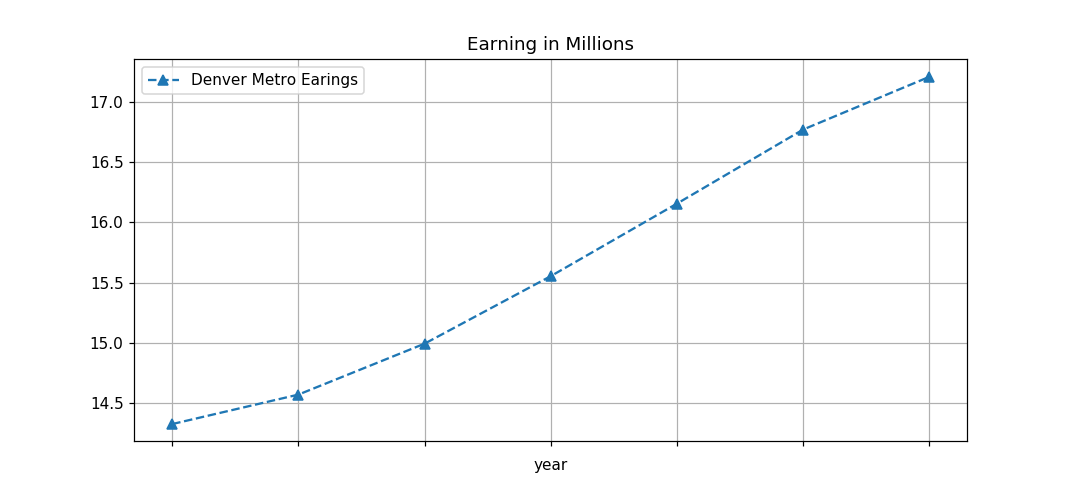

In [285]:
plt1 = df.plot(kind="line", x="year", y = 'Denver Metro Earings Total',marker= '^', linestyle='--',label='Denver Metro Earings',)
plt.title("Earning in Millions")
plt.grid(True)

<IPython.core.display.Javascript object>


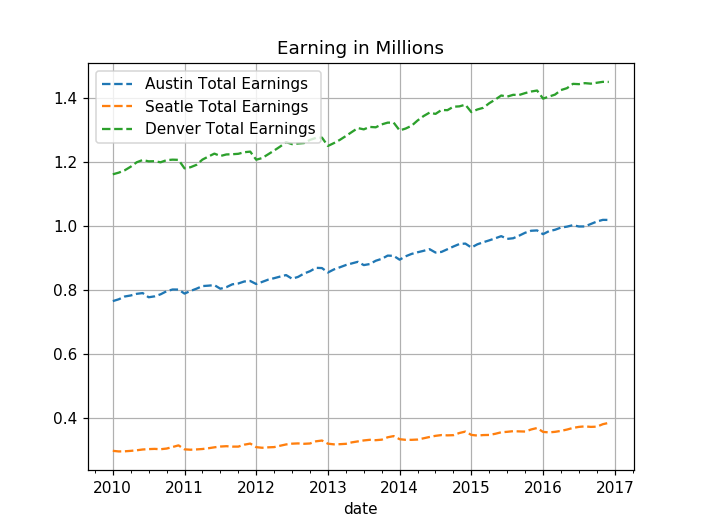

In [280]:
e_3_df_2 = e_3_df.reset_index()
plt4 = e_3_df_2.plot(kind="line", x="date",linestyle='--',label='Earnings Growth',)
plt.title("Earning in Millions")
plt.grid(True)

<IPython.core.display.Javascript object>


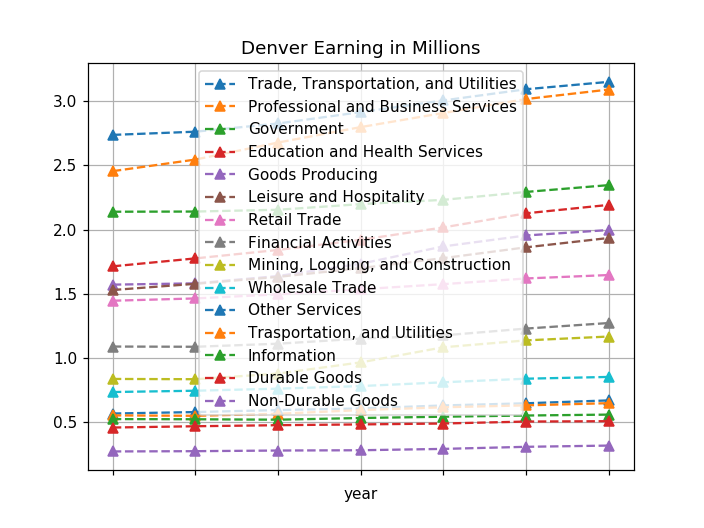

Text(0.5,1,'Denver Earning in Millions')

In [288]:
industry_broad = df.drop(columns=['Denver Metro Earings Total','Service-Providing','Total Private','Private Service Providing'])

p2 = industry_broad.plot(kind="line", x="year",linestyle='--', marker= '^',label='Earnings Growth',)
plt.grid(True)
plt.title("Denver Earning in Millions")

In [291]:
p18 = industry_broad.plot(kind=bar chart, label = 'Earnings Growth')

SyntaxError: invalid syntax (<ipython-input-291-d9bb2ca11720>, line 1)

<IPython.core.display.Javascript object>


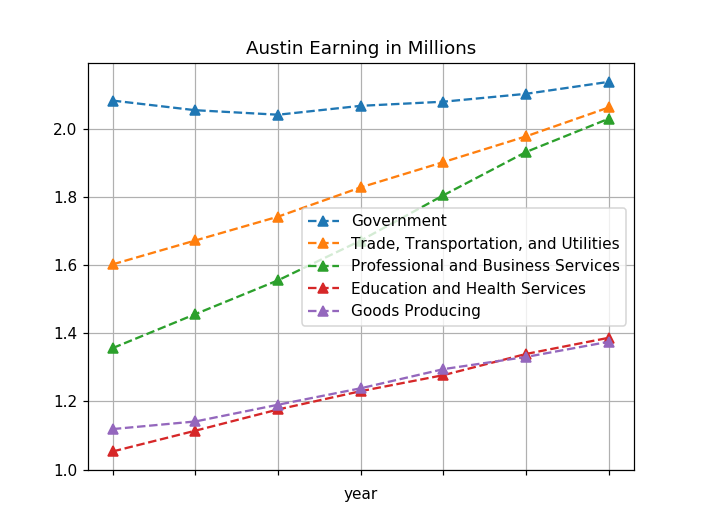

Text(0.5,1,'Austin Earning in Millions')

In [283]:
p5 = dfa.plot(kind="line", x="year",linestyle='--', marker= '^',label='Earnings Growth',)
plt.grid(True)
plt.title("Austin Earning in Millions")

<IPython.core.display.Javascript object>


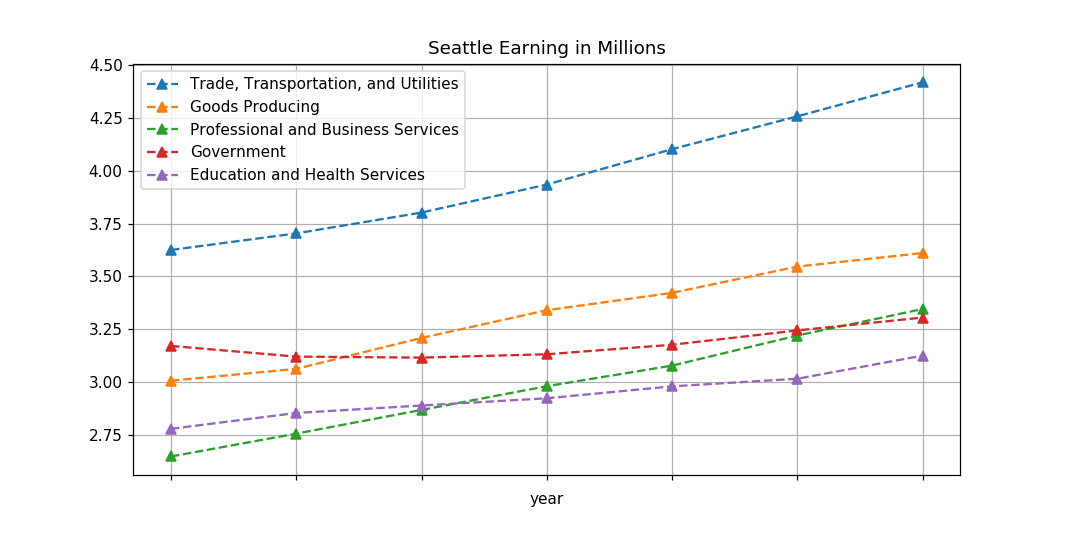

Text(0.5,1,'Seattle Earning in Millions')

In [284]:
p5 = dfs.plot(kind="line", x="year",linestyle='--', marker= '^',label='Earnings Growth',)
plt.grid(True)
plt.title("Seattle Earning in Millions")

In [189]:
industry_broad.head()


,year,"Trade, Transportation, and Utilities",Professional and Business Services,Government,Education and Health Services,Goods Producing,Leisure and Hospitality,Retail Trade,Financial Activities,"Mining, Logging, and Construction",Wholesale Trade,Other Services,"Trasportation, and Utilities",Information,Durable Goods,Non-Durable Goods
0,2010,2.7361,2.4541,2.1384,1.7137,1.5713,1.5295,1.4461,1.0897,0.8377,0.7360,0.5688,0.5540,0.5255,0.4598,0.2738
1,2011,2.7610,2.5442,2.1398,1.7755,1.5812,1.5777,1.4640,1.0880,0.8356,0.7460,0.5801,0.5510,0.5241,0.4698,0.2758
2,2012,2.8247,2.6767,2.1537,1.8412,1.6383,1.6316,1.4959,1.1118,0.8794,0.7621,0.5956,0.5667,0.5207,0.4780,0.2809
3,2013,2.9132,2.7968,2.1976,1.9199,1.7337,1.6998,1.5355,1.1514,0.9666,0.7823,0.6083,0.5954,0.5339,0.4840,0.2831
4,2014,3.0042,2.9066,2.2308,2.0164,1.8688,1.7776,1.5751,1.1765,1.0842,0.8117,0.6316,0.6174,0.5440,0.4910,0.2936


In [245]:
denver_comp = industry_broad.drop(columns=['Leisure and Hospitality', 'Retail Trade', 'Financial Activities',
       'Mining, Logging, and Construction', 'Wholesale Trade',
       'Other Services', 'Trasportation, and Utilities', 'Information',
       'Durable Goods', 'Non-Durable Goods'])

<IPython.core.display.Javascript object>


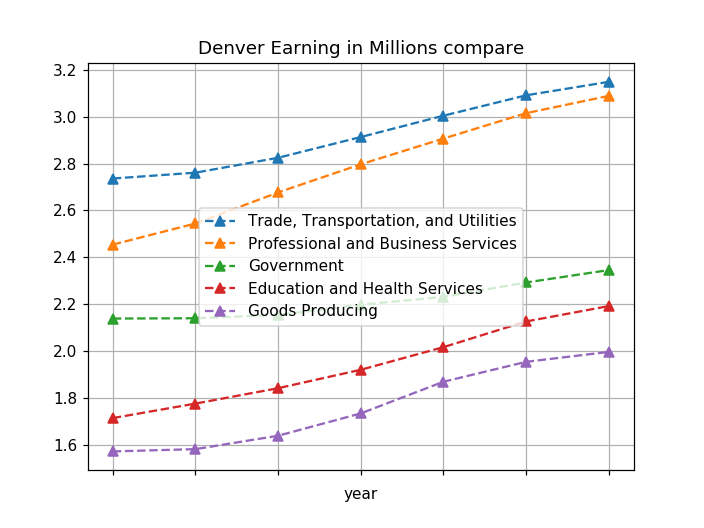

Text(0.5,1,'Denver Earning in Millions compare')

In [246]:
p7 = denver_comp.plot(kind="line", x="year",linestyle='--', marker= '^',label='Earnings Growth',)
plt.grid(True)
plt.title("Denver Earning in Millions compare")

In [55]:
den_year_earn_dis = df.describe()
den_year_earn_dis.reset_index()
yed = den_year_earn_dis
yed


,Denver Metro Earings Total,Service-Providing,Total Private,Private Service Providing,"Trade, Transportation, and Utilities","Trade, Transportation, and Utilities",Government,Education and Health Services,Goods Producing,Leisure and Hospitality,Retail Trade,Financial Activities,"Mining, Logging, and Construction",Wholesale Trade,Other Services,"Trasportation, and Utilities",Information,Durable Goods,Non-Durable Goods
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,15.654871,13.891557,13.440857,11.677543,2.925586,2.925586,2.214014,1.940629,1.763314,1.716014,1.540271,1.159943,0.986971,0.790157,0.614800,0.595157,0.537386,0.485429,0.290914
std,1.102677,0.926766,1.023838,0.847954,0.161613,0.161613,0.080437,0.178982,0.177079,0.149412,0.076718,0.071095,0.142584,0.045899,0.037144,0.039284,0.015423,0.018190,0.017597
min,14.327100,12.755800,12.188700,10.617400,2.736100,2.736100,2.138400,1.713700,1.571300,1.529500,1.446100,1.088000,0.835600,0.736000,0.568800,0.551000,0.520700,0.459800,0.273800
25%,14.782950,13.173200,12.636200,11.026450,2.792850,2.792850,2.146750,1.808350,1.609750,1.604650,1.479950,1.100750,0.858550,0.754050,0.587850,0.560350,0.524800,0.473900,0.278350
50%,15.554600,13.820900,13.357000,11.623300,2.913200,2.913200,2.197600,1.919900,1.733700,1.699800,1.535500,1.151400,0.966600,0.782300,0.608300,0.595400,0.533900,0.484000,0.283100
75%,16.463850,14.552550,14.202250,12.290950,3.047700,3.047700,2.261600,2.071250,1.911300,1.819600,1.597200,1.203000,1.110950,0.825650,0.640000,0.624850,0.548600,0.498650,0.301700
max,17.208800,15.212700,14.863400,12.867300,3.148700,3.148700,2.345400,2.191600,1.996100,1.934300,1.646000,1.272700,1.167600,0.853400,0.670800,0.649300,0.560300,0.509100,0.319400


<IPython.core.display.Javascript object>


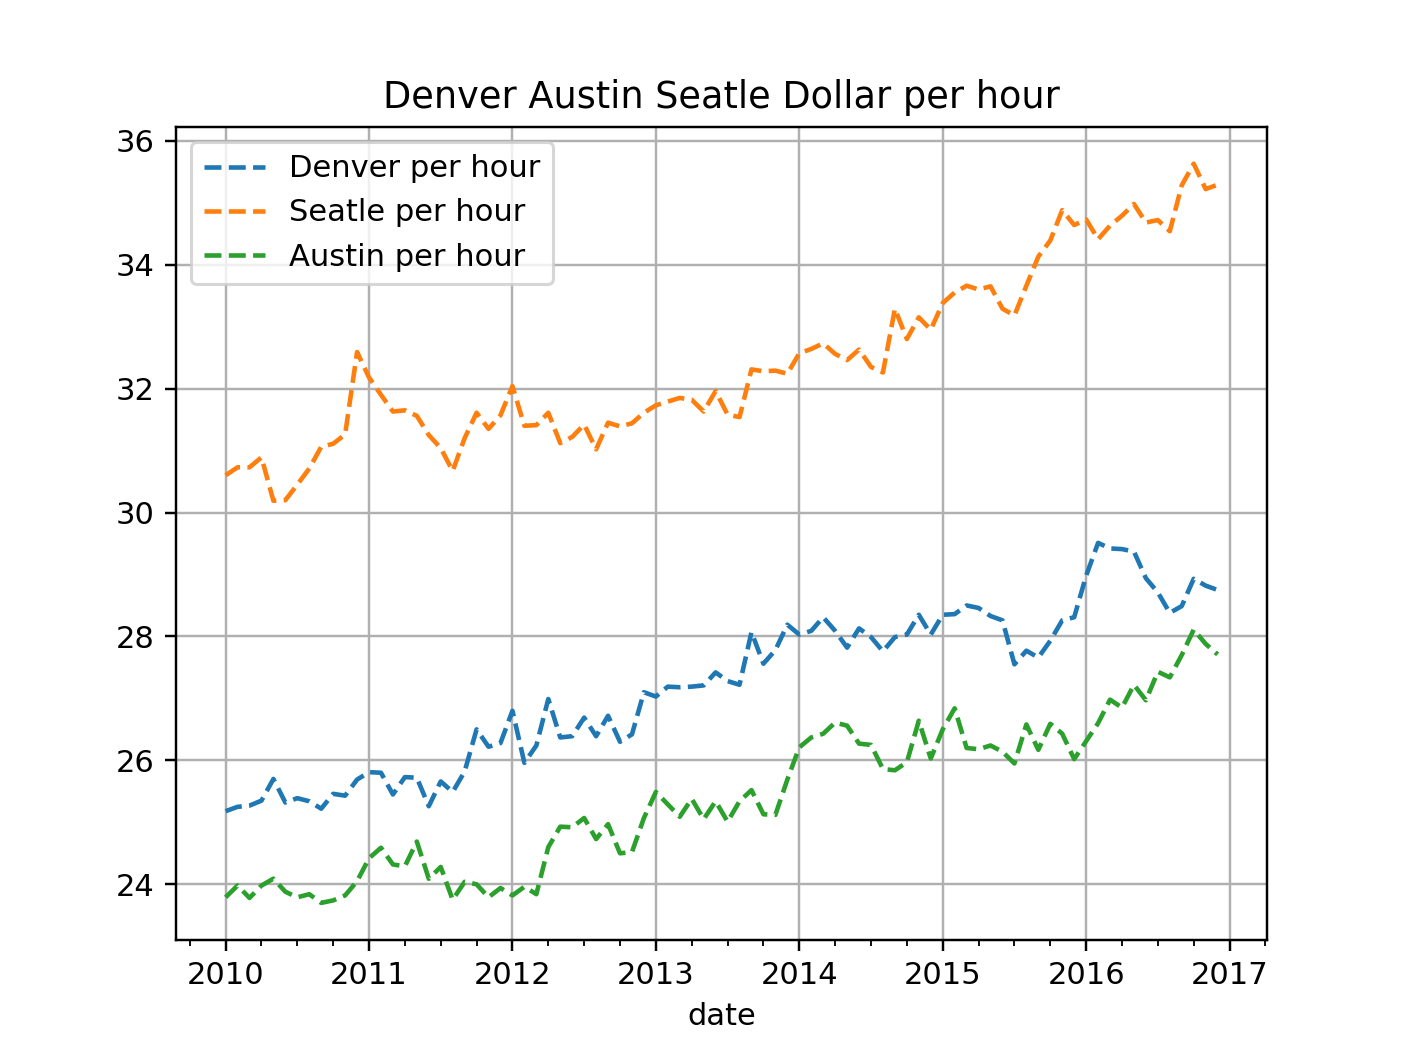

In [61]:
p3_1 = Three_cool_cities_i.plot(kind="line", x = "date",linestyle='--', label='Dollar per hour Growth')
plt.title("Denver Austin Seatle Dollar per hour")
plt.grid(True)

In [ ]:
#tsi_denver_e_mil.dtypes

In [ ]:
den_metro.head(2)



In [ ]:
mean_den_metro_10y.head()

In [ ]:
p1 = industry_broad.plot(kind="line", x="year",linestyle='--', marker= '^',label='Earnings Growth',)
plt.grid()


In [ ]:
# plot ind data
ax_1 = plt.gca()


den_job = industry_broad.plot(kind='line',x='year',y=['Proessional and Business Services',
                                                      'Education and Health Services',
                                                      'Leisure and Hospitality'],ax=ax_1)


plt.show()

In [ ]:
industry_broad.columns


In [195]:
ax_2 = plt.gca()


den_job_3 = denver_earings.plot(kind='line',x='year',y=[
       'Goods Producing',
       'Mining, Logging, and Construction', 'Durable Goods',
       'Financial Activities', 'Non-Durable Goods',
       'Trade, Transportation, and Utilities', 'Wholesale Trade',
       'Retail Trade', 'Trasportation, and Utilities', 'Information',
       'Financial Activities', 'Proessional and Business Services',
       'Education and Health Services', 'Leisure and Hospitality',
       'Other Services', 'Government'])



NameError: name 'denver_earings' is not defined

In [ ]:
def plotDistributions()